# Wind and current areas

This example illustrates how to add a wind area and how the wind-force is calculated.

Start with a simple hinged bar.

DAVEcore version = 2.0 from C:\python\miniconda3\envs\book\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


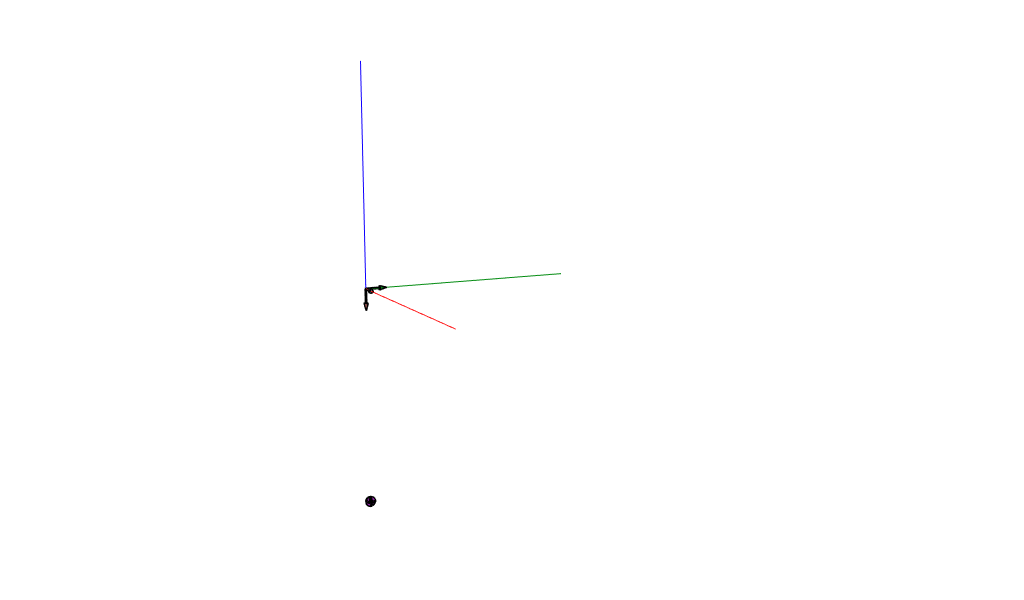

In [1]:
from DAVE import *
from DAVE.jupyter import *

s = Scene()
s.new_frame('hinge',fixed = (True,True,True, True, False, True))
s.new_rigidbody('Bar', parent='hinge', cog = (10,0,0), mass = 0.1)
s.solve_statics()

show(s)

Now add a point to the bar, and then add a wind-area to that point.

The wind-area is defined using an area (A) [m2] and a drag coefficient (Cd) [-].

In this case the area is defined as a plane. In that case the orientation of the
plane needs to be defined by defining its normal.

The normal is defined in the axis system of the frame that the area is attached to.

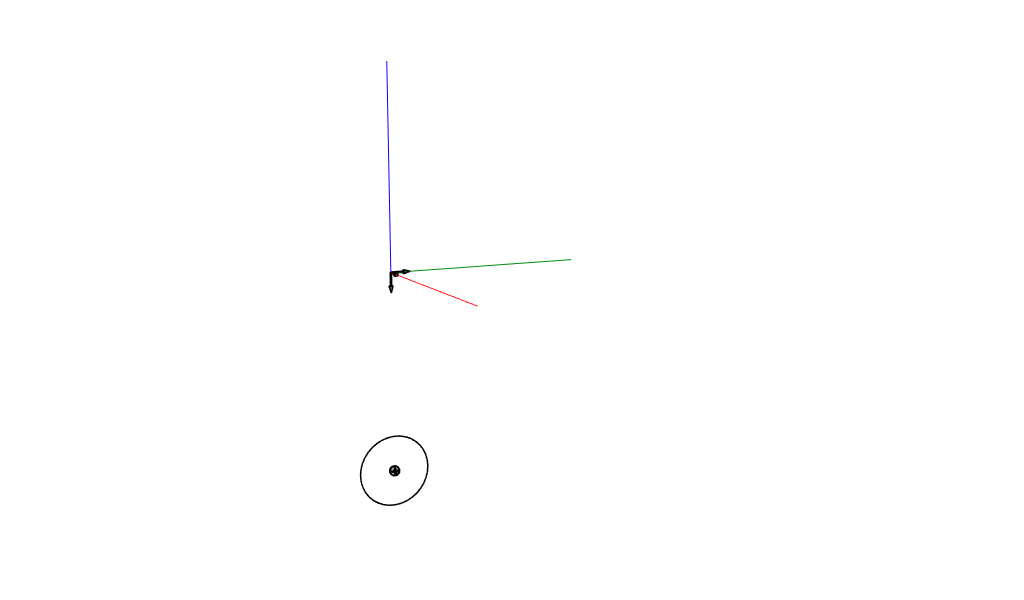

In [2]:
# add a point at the same location as the cog
s.new_point('point', parent='Bar', position = (10,0,0))

# and add a wind-area to that point
s.new_windarea('wind-area',
               parent='point',
               A = 10,
               Cd = 1.2,
               areakind=AreaKind.PLANE,
               direction = (0,0,1)
               )

show(s)

For the wind area to have effect, we need to have some wind.

Wind is defined at Scene level:

In [3]:
s.wind_velocity = 10 # m/s
s.wind_direction = 0 # deg --> going in direction of global x-axis.

s.solve_statics()



True

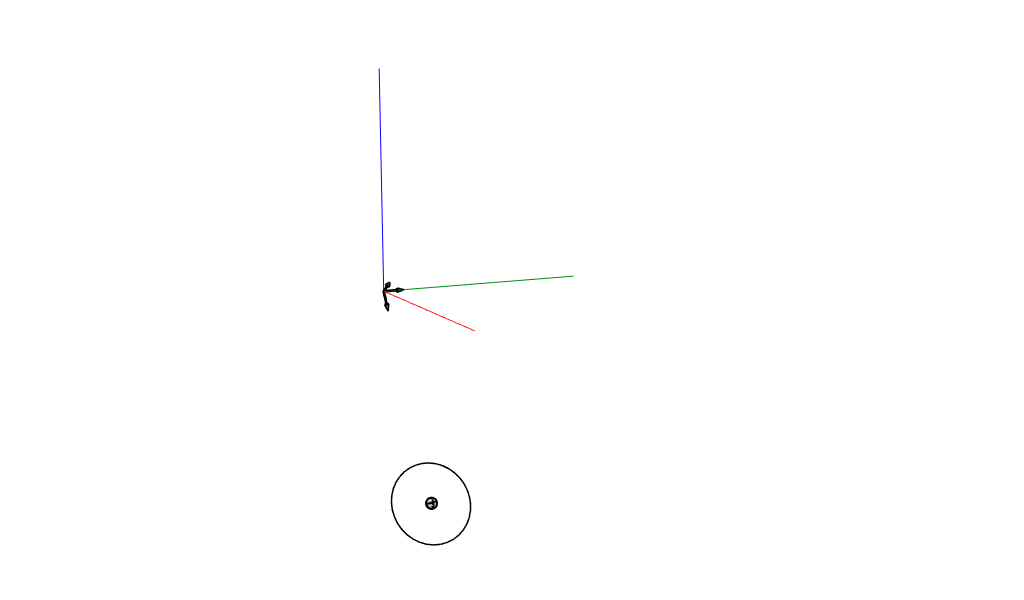

In [4]:
show(s, zoom_fit=True)

In [5]:
report(s['wind-area'])

Property,Value,Unit,Remarks,Explained
A,10.000,[m2],,Total area . See also Ae
Ae,8.395,[m2],,Effective area . This is the projection of the total to the actual wind/current direction. Read only.
Cd,1.200,[-],,Cd coefficient
areakind,AreaKind.PLANE,,,Defines how to interpret the area.
direction,"(0.000, 0.000, 1.000 )",,,"Depends on 'areakind'. For 'plane' this is the direction of the normal of the plane, for 'cylindrical' this is"
force,"(0.635, 0.000, 0.000 )","[kN,kN,kN]",global axis,"The x,y and z components of the force"
fx,0.635,[kN],global axis,The global x-component of the force
fy,0.000,[kN],global axis,The global y-component of the force
fz,0.000,[kN],global axis,The global z-component of the force
name,wind-area,,,"Name of the node (str), must be unique"


The wind is always horizontal. As the bar rotates the wind area rotates with it (remember: the direction of the plane is
defined in the local axis system). This lowers the effective wind area.

To get the angle of the bar (and the wind area) we can look at the trim of the bar or
its local x-axis:


In [6]:
report(s['Bar'],['trim', 'ux'])

Property,Value,Unit,Remarks,Explained
trim,57.090,[deg],,Trim in degrees. Bow-down is positive
ux,"(0.543, 0.000, -0.840 )","[m,m,m]",Global axis,The unit x axis


We can now check the effective wind area either from the angle:

In [7]:
from math import *
sin(radians(57.093))

0.8395534969904384

or from the z-component of the local x-axis:


In [8]:
s['Bar'].ux[2]

-0.8395224118438845

Both tell us that only about 84% of the area is faced in the direction of the wind. This
means the effective wind area (Ae) is 84% of the total area (A). Lets check that:

In [9]:
s['wind-area'].Ae / s['wind-area'].A

0.8395224118438845

The wind-force is always in the direction of the wind. It is calculated from the standard
formulation:

$F = 0.5 * rho * A * Cd * V^2$

In [10]:
w = s['wind-area']
F = 0.5 * s.rho_air * w.Ae * w.Cd * s.wind_velocity**2

print(F)

0.6346789433539768


And verify that it is equal to the reported wind-force of the wind-area:

In [11]:
report(w, ['*x*'])  # anything with 'x'

Property,Value,Unit,Remarks,Explained
fx,0.635,[kN],global axis,The global x-component of the force


And while we're at it, verify that this force is countered by the hinge:

In [12]:
report(s['hinge'], ['*connection_force*'])

Property,Value,Unit,Remarks,Explained
connection_force,"(0.635, 0.000, -0.981, 0.000, 0.000, 0.000 )","[kN, kN, kN, kNm, kNm, kNm]",Parent axis,The forces and moments that this axis applies on its parent at the origin of this axis system.
connection_force_x,0.635,[kN],Parent axis,The x-component of the connection-force vector
connection_force_y,0.000,[kN],Parent axis,The y-component of the connection-force vector
connection_force_z,-0.981,[kN],Parent axis,The z-component of the connection-force vector


## Currents

Currents work exactly the same but then with:

- s.new_currentarea(...)
- s.rho_water
- s.current_direction
- s.current_velocity